# Show ARMA predictions for one signal

## Imports and inputs

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA

train1 = pd.read_csv('../data/training_1.csv')
train2 = pd.read_csv('../data/training_2.csv')

## ARMA

### Fit model on signal F_PU7

In [103]:
signal = "F_PU7"

model = ARMA(train1[signal], order=(4,4))
model_fit = model.fit()

### Define the predict function

In [104]:
'''
predict the next value in a time series given the history and a list of coefficients.
'''
def predict(coef, history):
    yhat = 0.0
    for i in range(1, len(coef)+1):
        yhat += coef[i-1] * history[-i]
    return yhat

### Predict the test signal and compute residuals

In [105]:
# define the test signal
test = train2[signal]
# obtain AR and MA coefficients
ar_coef = model_fit.arparams
ma_coef = model_fit.maparams
# keep previous residuals and previous signal values (from training)
resid = [x for x in model_fit.resid]
history = [x for x in train1[signal]]

# start predicting!
predictions = list()
for t in range(len(test)):
    # next value prediction
    yhat = predict(ar_coef, history) + predict(ma_coef, resid)
    
    # book-keeping
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    resid.append(obs-yhat)

# compute residuals
res = np.subtract(test, predictions)
res = res - np.mean(res)

### Plot

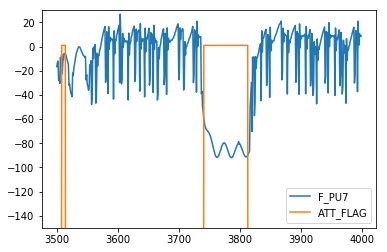

In [106]:
# which part of the signal should be shown
show_from = 3500
show_to = 4000

# plot residuals and the truth label
plt.plot(res[show_from:show_to])
plt.plot(train2['ATT_FLAG'][show_from:show_to])
axes = plt.gca()
axes.set_ylim([-150,30])
plt.legend()
plt.savefig('arma_{}'.format(signal))
plt.show()

## Show where attacks took place

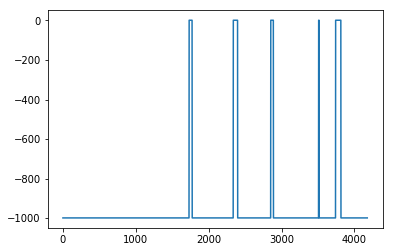

In [107]:
plt.plot(train2['ATT_FLAG'])